In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [3]:
credit_card_data = pd.read_csv('creditcard.csv', encoding='latin-1')

In [4]:
credit_card_data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
credit_card_data.shape

(284807, 31)

In [6]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

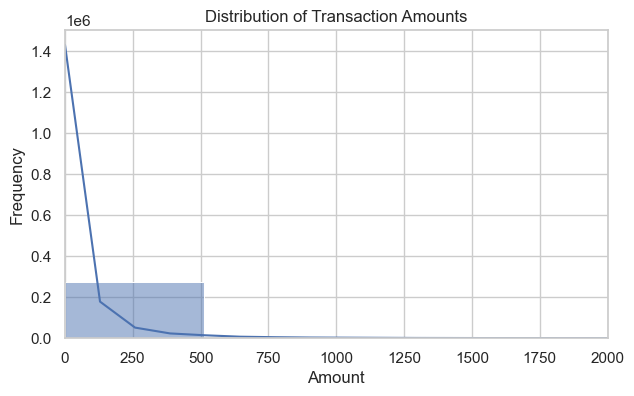

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Histogram for transaction amounts
plt.figure(figsize=(7, 4))
sns.histplot(credit_card_data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.xlim(0,2000)
plt.show()

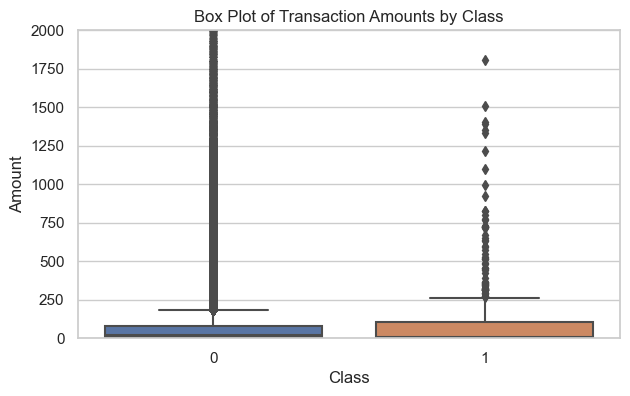

In [11]:
# Box plot for transaction amounts by Class
plt.figure(figsize=(7,4))
sns.boxplot(x='Class', y='Amount', data=credit_card_data)
plt.title('Box Plot of Transaction Amounts by Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.ylim(0,2000)
plt.show()

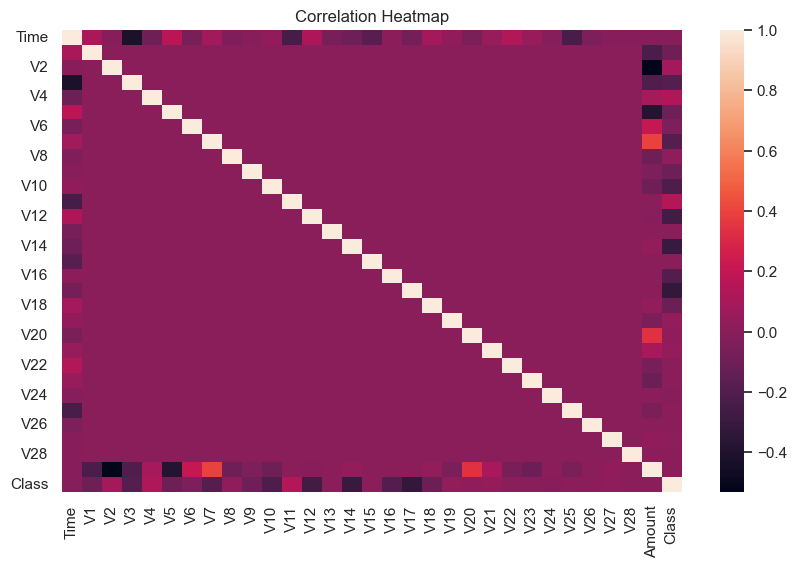

In [12]:
# Correlation heatmap
correlation_matrix = credit_card_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix,  annot=False)
plt.title('Correlation Heatmap')
plt.show()

In [13]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [14]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [16]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [17]:
legit_sample = legit.sample(n=492)

In [18]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [19]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
103769,68785.0,-2.291870,-0.222693,2.019713,0.834219,0.007270,-0.126386,-0.095041,0.542176,-0.645530,...,0.175924,0.222475,-0.062408,-0.039041,0.411421,0.931766,-0.235431,-0.055730,107.77,0
217877,141079.0,1.644255,-0.726884,-0.836590,1.247120,-0.216017,0.123339,-0.164694,-0.104254,0.816753,...,0.288389,0.583782,-0.178243,-0.984109,0.006609,-0.523698,0.023642,-0.003371,207.00,0
145141,86670.0,-3.627733,3.730936,-2.740726,-1.998892,0.228178,-1.464373,1.024978,0.354373,2.225515,...,-0.166972,0.578680,-0.095127,-0.515353,0.357028,0.114278,1.269921,0.529480,0.77,0
106606,70032.0,0.987500,-1.789656,0.560173,-1.529135,-1.109635,1.605726,-1.489090,0.559098,-1.909778,...,0.200558,0.783467,-0.015943,-1.015499,-0.053440,-0.007850,0.092881,0.027946,158.00,0
153842,100355.0,0.093038,0.729556,0.150040,-0.005992,-0.428817,-0.606463,-0.217213,0.017891,-0.763112,...,0.476218,1.588429,-0.119266,1.205628,-0.499586,0.338172,0.071522,0.132411,15.00,0


In [20]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [21]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [22]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,88123.766260,-0.141536,-0.044042,0.104371,0.030679,-0.064306,0.070613,-0.003918,-0.012031,-0.055859,...,-0.001966,-0.021416,-0.040101,0.032636,-0.002719,0.011367,0.000275,-0.014343,-0.009334,96.932642
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [23]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [24]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
103769   68785.0 -2.291870 -0.222693  2.019713  0.834219  0.007270 -0.126386   
217877  141079.0  1.644255 -0.726884 -0.836590  1.247120 -0.216017  0.123339   
145141   86670.0 -3.627733  3.730936 -2.740726 -1.998892  0.228178 -1.464373   
106606   70032.0  0.987500 -1.789656  0.560173 -1.529135 -1.109635  1.605726   
153842  100355.0  0.093038  0.729556  0.150040 -0.005992 -0.428817 -0.606463   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [25]:
print(Y)

103769    0
217877    0
145141    0
106606    0
153842    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [28]:
model = LogisticRegression()

In [29]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

In [30]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [31]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.928843710292249


In [32]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [33]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.934010152284264


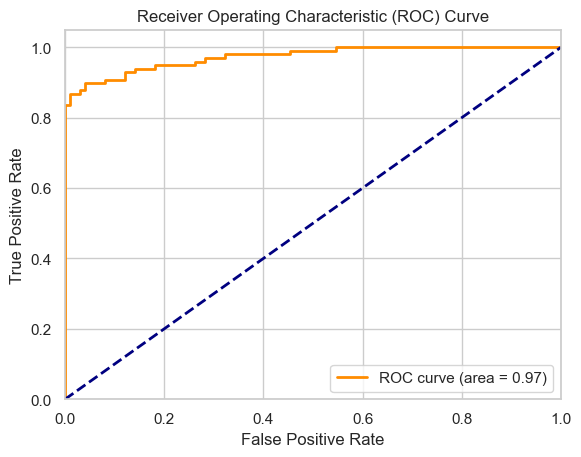

In [34]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Predict probabilities for the test set
Y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)

# Compute AUC score
auc_score = roc_auc_score(Y_test, Y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [35]:
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.52      0.51      0.51        99
           1       0.51      0.53      0.52        98

    accuracy                           0.52       197
   macro avg       0.52      0.52      0.52       197
weighted avg       0.52      0.52      0.52       197



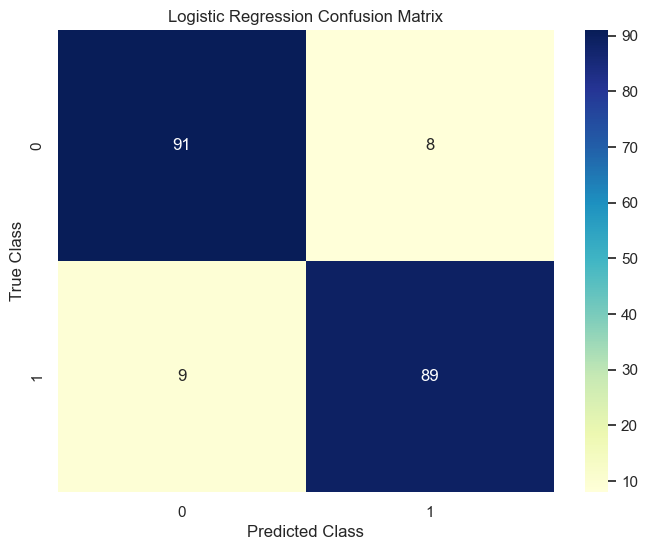

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
X_test_prediction = model.predict(X_test)
confusion_matrix = confusion_matrix(Y_test, X_test_prediction)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu", fmt="d")
# Adding labels and title
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Logistic Regression Confusion Matrix")

plt.show()


In [37]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [38]:
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [39]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [40]:
predictionsdtc = model.predict(X_test)
test_data_accuracy = accuracy_score(predictionsdtc, Y_test)
test_data_accuracy

0.8934010152284264

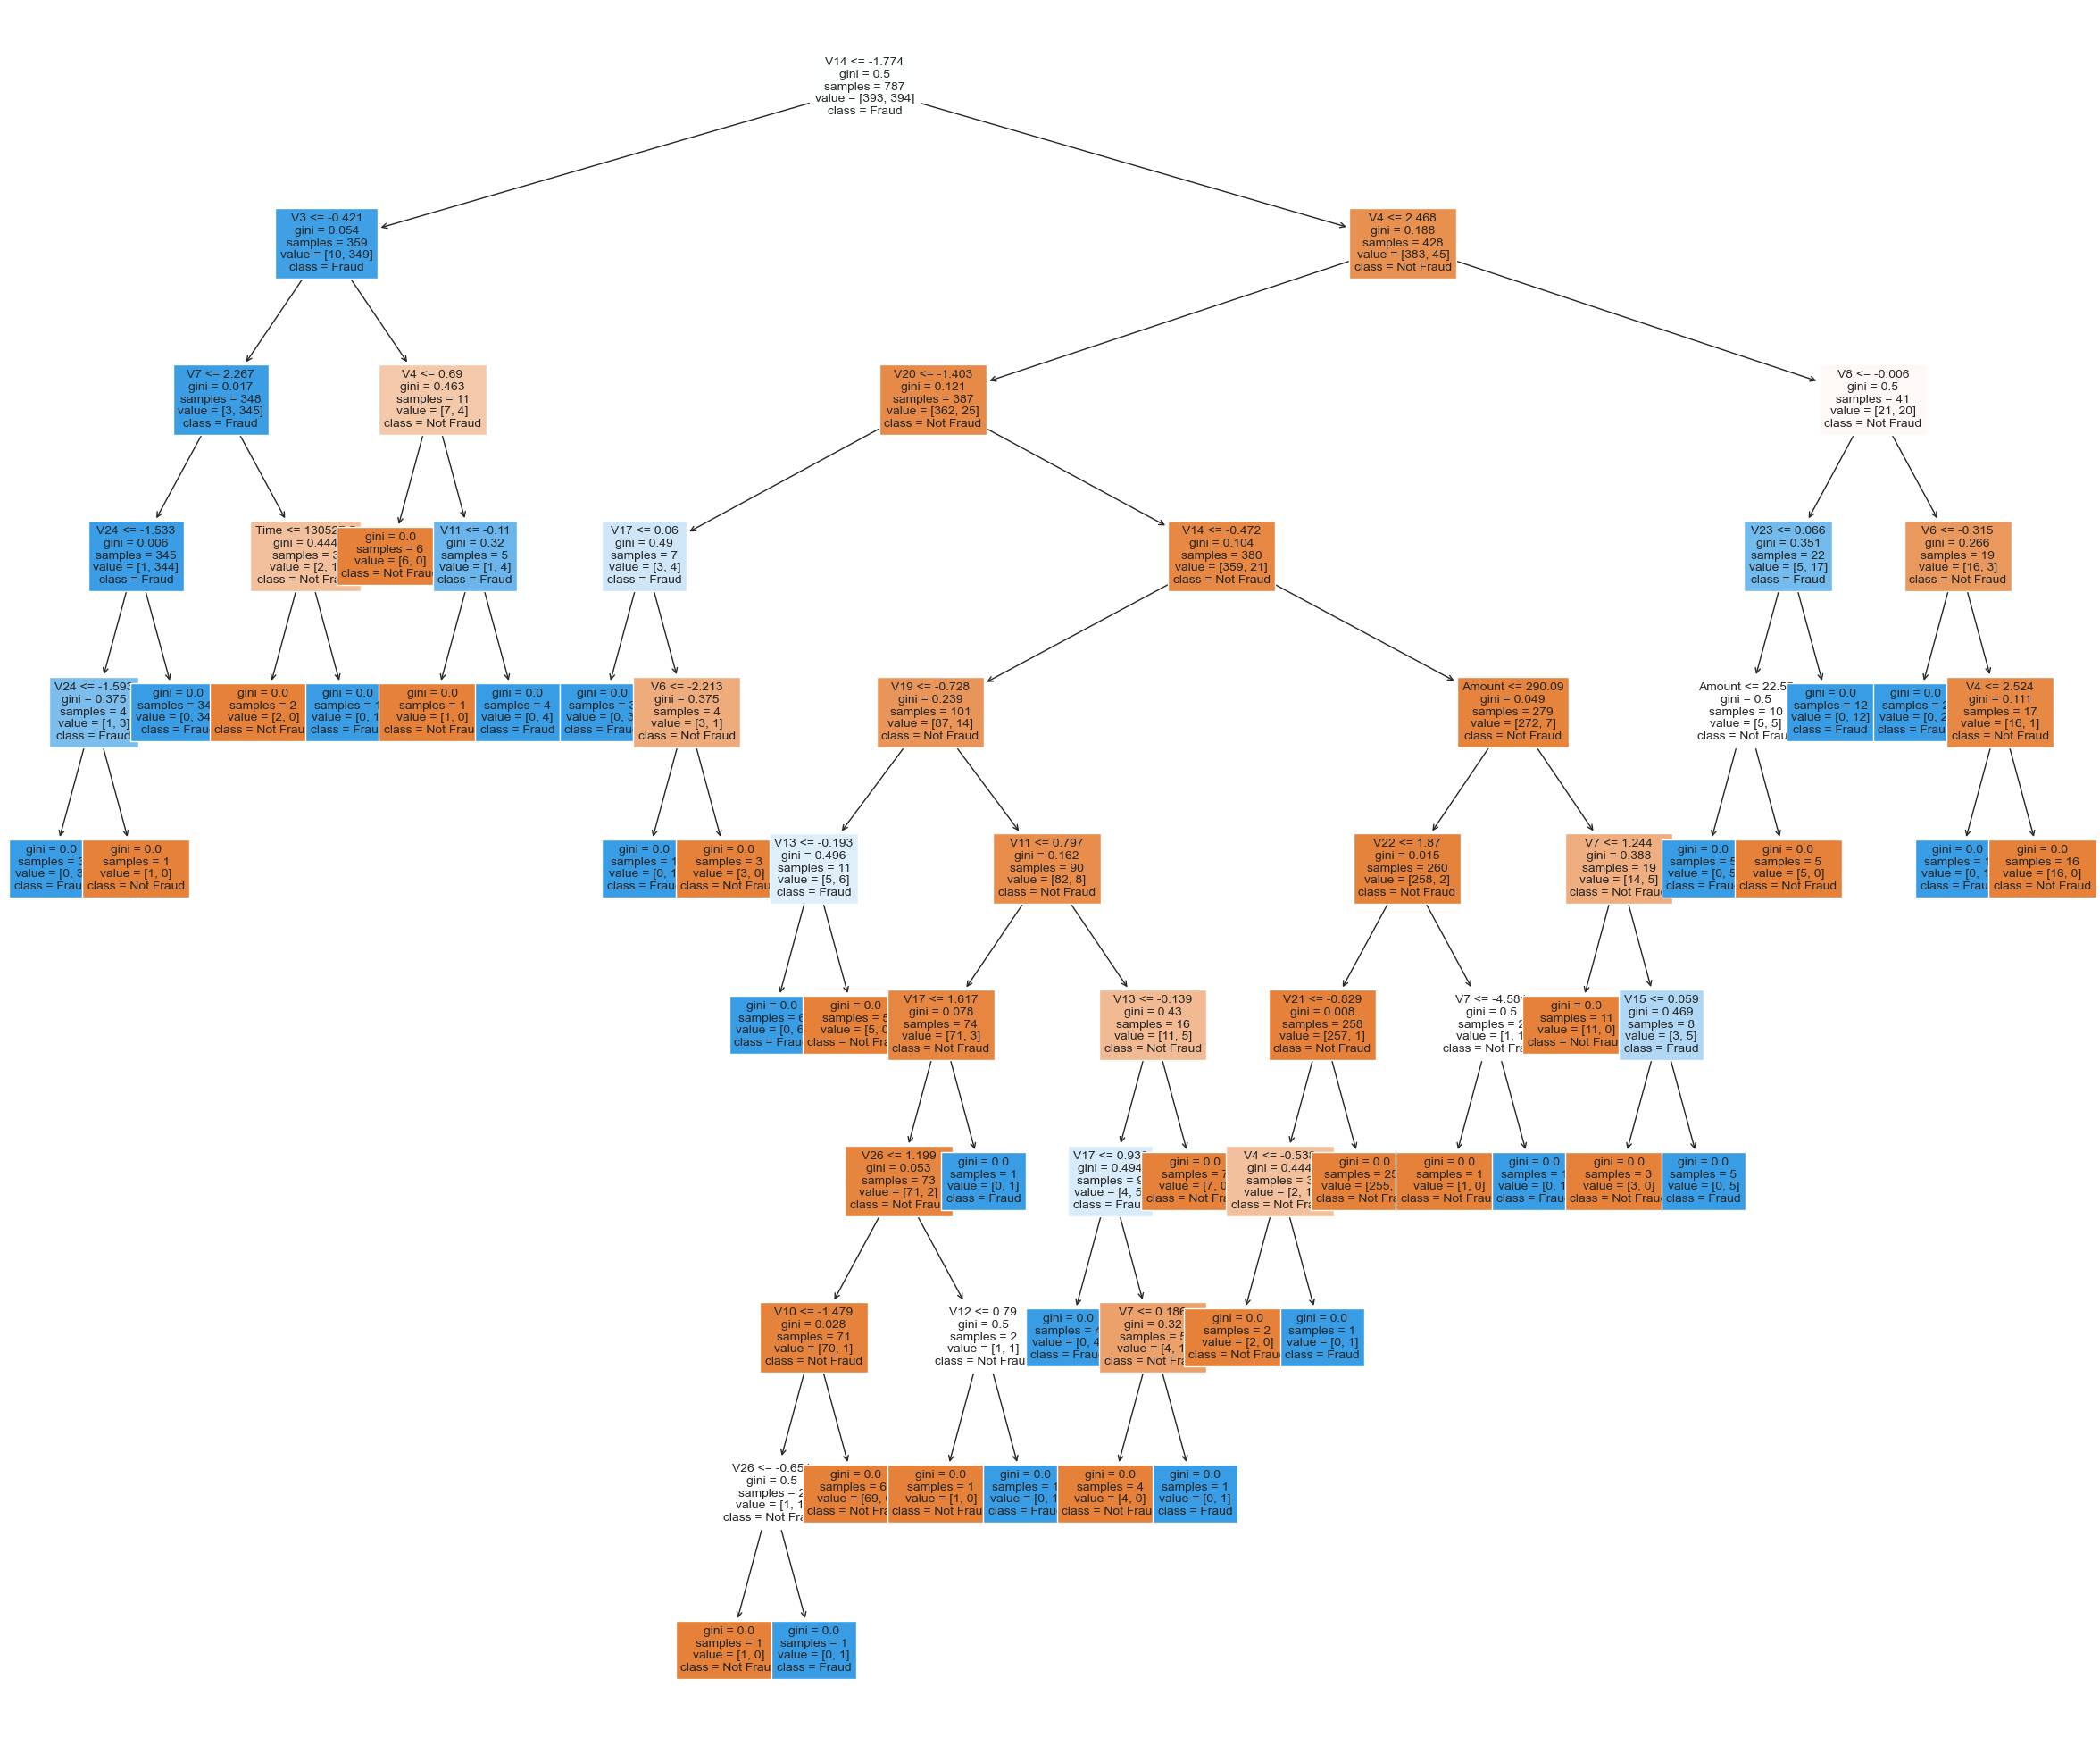

In [43]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np

# Assuming `model` is your trained Decision Tree Classifier

plt.figure(figsize=(30, 25))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Not Fraud', 'Fraud'], fontsize=10)
plt.show()


In [44]:
print(classification_report(Y_test, predictionsdtc))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90        99
           1       0.91      0.88      0.89        98

    accuracy                           0.89       197
   macro avg       0.89      0.89      0.89       197
weighted avg       0.89      0.89      0.89       197



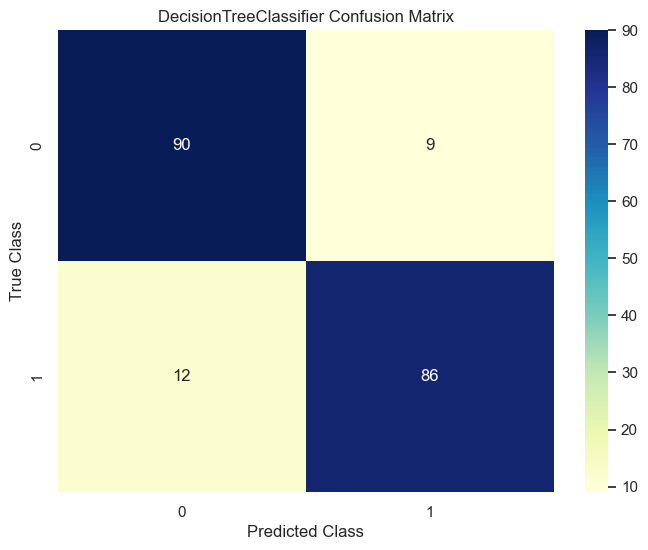

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
predictionsdtc = model.predict(X_test) 
confusion_matrix = confusion_matrix(Y_test, predictionsdtc)

# Create a heatmap with colors
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu", fmt="d")

# Add labels and title
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("DecisionTreeClassifier Confusion Matrix")

# Show the plot
plt.show()


In [46]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [47]:
predictionsrfc = model.predict(X_test)
test_data_accuracy = accuracy_score(predictionsrfc, Y_test)
test_data_accuracy

0.9187817258883249

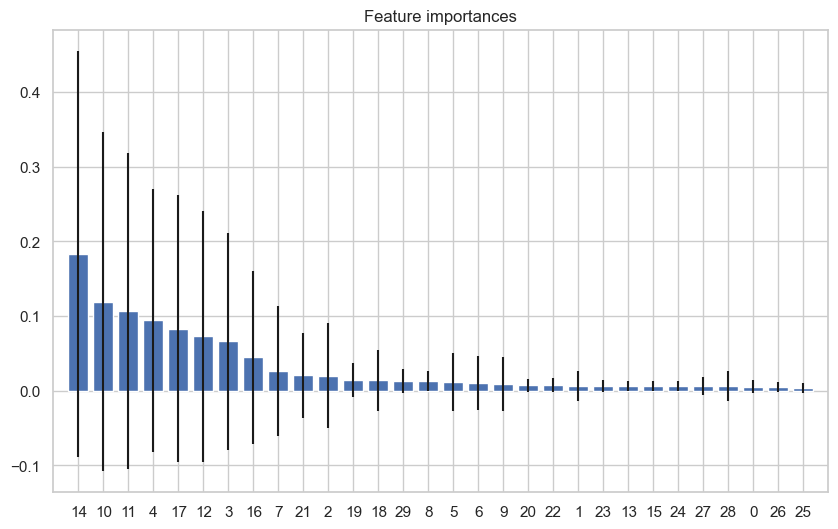

In [48]:
# Plot feature importances
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()


In [49]:
print(classification_report(Y_test, predictionsrfc))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        99
           1       0.95      0.89      0.92        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



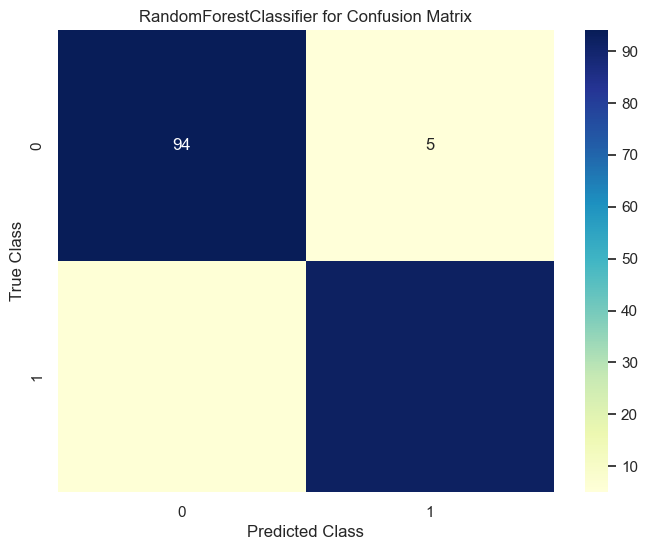

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
predictionsrfc = model.predict(X_test)
confusion_matrix = confusion_matrix(Y_test, predictionsrfc)

# Create a heatmap with colors
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu", fmt="d")

# Add labels and title
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("RandomForestClassifier for Confusion Matrix")

# Show the plot
plt.show()


In [59]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, Y_train)

GradientBoostingClassifier()

In [60]:
predictionsgbc = model.predict(X_test)
test_data_accuracy = accuracy_score(predictionsgbc, Y_test)
test_data_accuracy

0.9441624365482234

In [61]:
print(classification_report(Y_test, predictionsgbc))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        99
           1       0.94      0.95      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



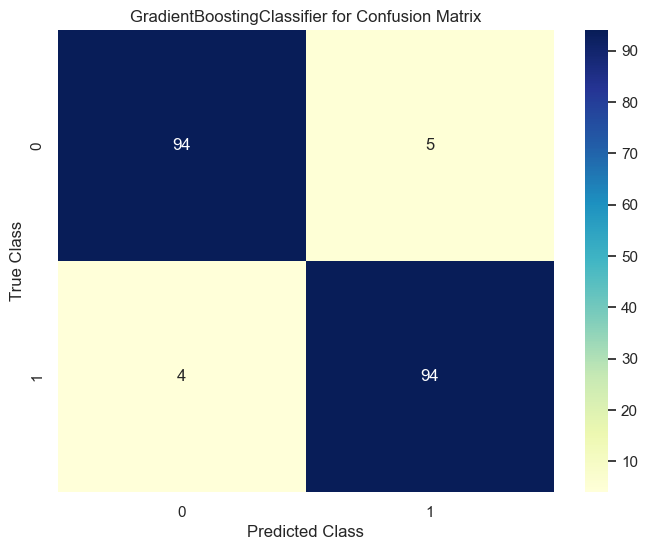

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
predictionsgbc = model.predict(X_test)
confusion_matrix = confusion_matrix(Y_test, predictionsgbc)

# Create a heatmap with colors
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu", fmt="d") 

# Add labels and title
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("GradientBoostingClassifier for Confusion Matrix")

# Show the plot
plt.show()


In [50]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

In [67]:
results = {}
for name, model in models.items():
    accuracy = accuracy_score(Y_test, Y_pred)
    ClassificationReport= classification_report(Y_test, Y_pred)
    results[name] = {"Accuracy": accuracy, "Classification Report": ClassificationReport}

In [68]:
results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  \
Logistic Regression  0.949239   
Decision Tree        0.949239   
Random Forest        0.949239   
Gradient Boosting    0.949239   

                                                 Classification Report  
Logistic Regression                precision    recall  f1-score   ...  
Decision Tree                      precision    recall  f1-score   ...  
Random Forest                      precision    recall  f1-score   ...  
Gradient Boosting                  precision    recall  f1-score   ...  


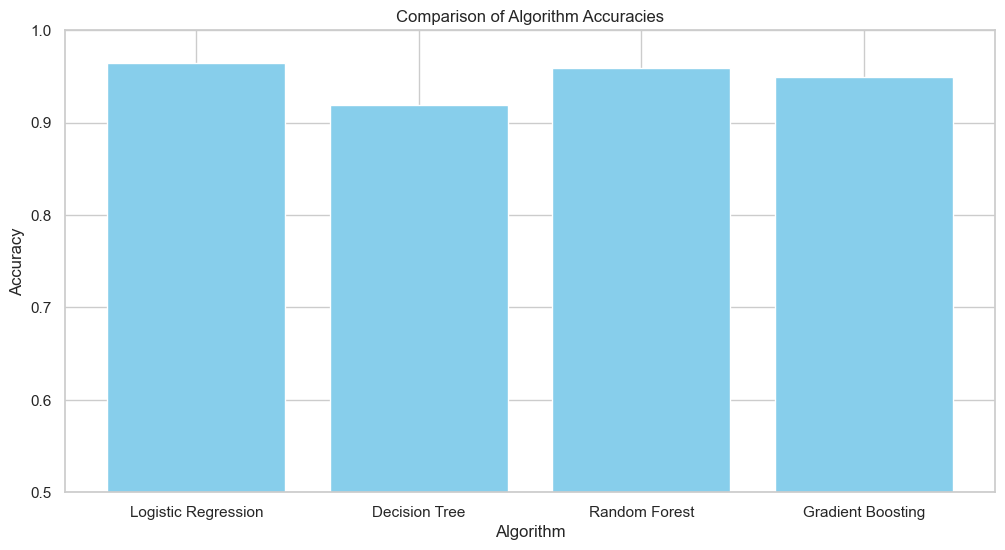

In [53]:
import matplotlib.pyplot as plt

accuracies = {model_name: results[model_name]["Accuracy"] for model_name in results}

plt.figure(figsize=(12, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Comparison of Algorithm Accuracies')
plt.ylim([0.5, 1.0])  
plt.show()

In [54]:
class_reports = {}
for name, model in models.items():
    Y_pred = model.predict(X_test)
    class_reports[name] = classification_report(Y_test, Y_pred, output_dict=True)

In [55]:
precision_1 = [class_reports[name]['1']['precision'] for name in models]
recall_1 = [class_reports[name]['1']['recall'] for name in models]
f1_score_1 = [class_reports[name]['1']['f1-score'] for name in models]

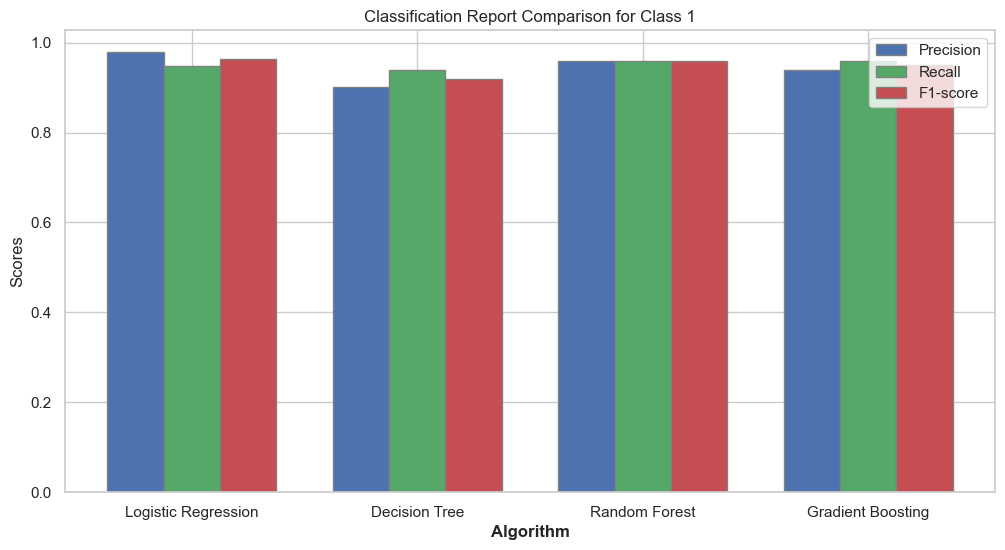

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Assuming `models` is a dictionary containing the trained models

class_reports = {}
for name, model in models.items():
    Y_pred = model.predict(X_test)
    class_reports[name] = classification_report(Y_test, Y_pred, output_dict=True)['1']  # Use only Class 1 metrics

precision = [class_reports[name]['precision'] for name in models]
recall = [class_reports[name]['recall'] for name in models]
f1_score = [class_reports[name]['f1-score'] for name in models]

barWidth = 0.25
r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(12, 6))

plt.bar(r1, precision, color='b', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='g', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(r3, f1_score, color='r', width=barWidth, edgecolor='grey', label='F1-score')

plt.xlabel('Algorithm', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(models))], models.keys())
plt.ylabel('Scores')
plt.title('Classification Report Comparison for Class 1')
plt.legend()
plt.show()
